In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression with one feature

In [2]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars.isna().any()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

## 1. Define the gradient descent function

In [4]:
def myFnLinReg(X, Y):
    lr = 0.01
    iterations = 1000
    m = X.shape[0]
    teta0 = 0
    teta1 = 0
    
    for i in range(iterations):
        Y_pred = teta0 + teta1 * X
        d_teta0 = (2 / m) * np.sum(Y_pred - Y)
        d_teta1 = (2 / m) * np.sum(np.dot(X.T, Y_pred - Y))
        teta0 = teta0 - lr * d_teta0
        teta1 = teta1 - lr * d_teta1
        
    return teta0, teta1

## 2. 80-20 split of train and test data

In [5]:
X = np.array(mtcars['wt']).reshape(-1,1)
X_train = X[ : 25]
X_test = X[25 : ]
X.shape

(32, 1)

In [6]:
Y = np.array(mtcars['mpg']).reshape(-1,1)
Y_train = Y[ : 25]
Y_test = Y[25 : ]
Y.shape

(32, 1)

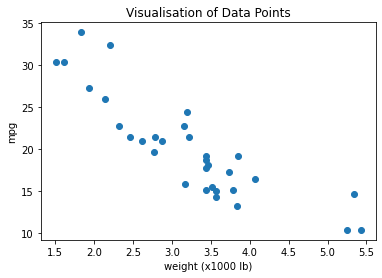

In [7]:
plt.scatter(X,Y)
plt.title('Visualisation of Data Points')
plt.xlabel('weight (x1000 lb)')
plt.ylabel('mpg')
plt.show()

In [8]:
teta0, teta1 = myFnLinReg(X_train,Y_train)

## 3. mpg for car wt 5.5

In [9]:
teta0 + teta1 * 5.5

13.088104751004012

As per the trained model, the car with 5500 lb shall give a mileage of 13.088 mpg

## 4. Accuracy measures

### R^2 measure

In [10]:
# Correlation coefficient r
mtcars['wt'].corr(mtcars['mpg'])
# negative coerraltion as expected from scatter plot

-0.8676593765172281

In [11]:
# r^2 value
np.square(mtcars['wt'].corr(mtcars['mpg']))

0.752832793658265

### RMSE measure

In [12]:
Y_pred = teta0 + teta1 * X_test
Y_pred

array([[22.89214643],
       [22.32837966],
       [24.05268095],
       [19.49579538],
       [20.59582811],
       [18.39576266],
       [20.56832729]])

In [13]:
MSE = (1/ X_test.shape[0]) * np.sum(np.square(Y_pred - Y_test))
RMSE = np.sqrt(MSE)
RMSE

3.7774277563365164

Given the magnitudes of mpg, the RMSE is good. The Linear Model is satisfactory

## 5. Stochastic and Mini batch gradient descents

In [14]:
def miniBatchGD(stacked):
    lr = 0.01
    iterations = 1000
    m = stacked.shape[0]
    batch_size = 5
    teta0 = 0
    teta1 = 0
    batches = []
    cost_list = []
    
    # make batches
    for i in range(batch_size):
        batch = stacked[i * batch_size : (i+1) * batch_size, : ]
        batches.append(batch)
        
    # gradient descent
    for i in range(iterations):
        X = np.array(batches[i % 5][ : , 0]).reshape(-1, 1)
        Y = np.array(batches[i % 5][ : , 1]).reshape(-1, 1)
        Y_pred = teta0 + teta1 * X
        cost = (1 / (2 * batch_size)) * np.sum(np.square(Y_pred - Y))
        d_teta0 = (2 / batch_size) * np.sum(Y_pred - Y)
        d_teta1 = (2 / batch_size) * np.sum(np.dot(X.T, Y_pred - Y))
        teta0 = teta0 - lr * d_teta0
        teta1 = teta1 - lr * d_teta1
        cost_list.append(cost)
    
    return teta0, teta1, cost_list

In [15]:
def stochasticGD(X, Y):
    lr = 0.01
    iterations = 1000
    m = X.shape[0]
    teta0 = 0
    teta1 = 0
    cost_list = []
    
    for i in range(iterations):
        index = np.random.randint(0, m)
        x = X[index]
        y = Y[index]
        y_pred = teta0 + teta1 * x
        cost = (1 / (2 * m)) * np.square(y_pred - y)
        d_teta0 = (2 / m) * (y_pred - y)
        d_teta1 = (2 / m ) * (y_pred - y) * x
        teta0 = teta0 - lr * d_teta0
        teta1 = teta1 - lr * d_teta1
        cost_list.append(cost)
        
    return teta0, teta1, cost_list

### Stochastic Gradient Descent

In [16]:
teta0, teta1, cost_list = stochasticGD(X_train, Y_train)

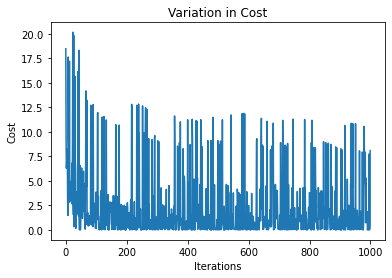

In [17]:
plt.plot(cost_list)
plt.title('Variation in Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Mini-batch Gradient Descent

In [18]:
stacked = np.hstack((X_train, Y_train)) # stacking both input and output to be divided into batches

In [19]:
teta0, teta1, cost_list = miniBatchGD(stacked)

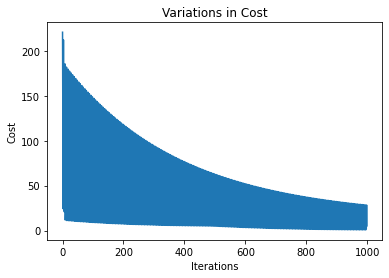

In [20]:
plt.plot(cost_list)
plt.title('Variations in Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()